# **SENTIMENT ANALYSIS OF TWEETS DURIN KENYA'S 2022 PRESIDENTIAL ELECTIONS**


## Introduction



Social media has become an integral part of modern-day political campaigns with political candidates and parties using platforms such as Twitter, Facebook, and Instagram to reach and engage with voters.

Social media can impact election outcomes in various ways such as through campaigning, voter outreach, public opinion analysis, misinformation spread, and targeted advertising. However, the impact of social media on elections is not yet fully understood.

This research will use machine learning algorithms to explore the relationship between social media (Twitter) activity and election outcomes, providing insights into the influence of social media(Twitter) on election campaigns.


---



## Problem Statement


The widespread use of social media especially Twitter in recent years has dramatically changed the way political campaigns reach and engage with potential voters.

However, despite its widespread use, there is limited research on the extent to which Twitter influences election outcomes and the role of data science techniques in monitoring public opinion and misinformation on social media platforms.

The increasing use of social media in political campaigns has also raised concerns about the spread of misinformation, fake news, and biased algorithms.

The purpose of this study is to address this gap in the literature by examining the influence of social media on election campaigns and the role of data science techniques in monitoring public opinion and misinformation.

This study will help to better understand the sentiments shared on Twitter duringg Kenya Election 2022 . The findings of this study will have important implications for political campaigns, providing valuable insights into the role of social media and data science in modern political campaigns.


---



## Objectives of the Study

The primary objective of this research is to study the relationship between social media (Twitter) activity and election outcomes.

The following specific objectives will be addressed:
1.	To study twitter users based on their tweets to determine their political party preference
2.	To segment twitter users into distinct groups based on their political party preference

3.	To provide insights into the influence of social media on election campaigns and identify any patterns or trends that emerge.


---



## Experimental Design

The research will employ a mixed-methods approach, including both qualitative and quantitative methods.

Data will be collected from Twitter social media platform using APIs or  web scraping techniques.

The collected data will be preprocessed and analyzed using machine learning algorithms such as classification, clustering, and regression. The performance of the models will be evaluated using metrics such as accuracy, precision, recall, and F1 score.


---



## Data Gathering

We use snscrape to scrape data from twitter

In [ ]:
# Installing SNScrape for webscraping data off twitter

#!pip install snscrape

In [ ]:
# Importing all necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import pickle


In [ ]:
#Reading data set into dataFrame
election_data= pd.read_csv("/content/election_data.csv")

In [ ]:
#previewing dataset
election_data.head()

,Unnamed: 0,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,retweets
0,0,MosesHaabwa,False,2021-12-12 22:15:10+00:00,2176,943,0,en,2022-08-21 22:59:21+00:00,0,Twitter for Android,1561488152166023168,"@MosesHaabwa was verified, @cisuganda was veri...",['Ruto'],1561486199067394048,https://twitter.com/MosesHaabwa,NaN,NaN,0
1,1,EremonDaniel,False,2019-10-02 04:33:26+00:00,1448,3985,0,en,2022-08-21 18:53:46+00:00,0,Twitter for Android,1561426349763477504,@Rephael_Tuju @WilliamsRuto As you talk of #Ru...,['Ruto'],1560873200816463872,https://twitter.com/RaphaelTujuEGH,NaN,NaN,0
2,2,LabanWekz,False,2021-04-14 04:46:08+00:00,33,90,0,en,2022-08-21 17:16:43+00:00,0,Twitter Web App,1561401927623397376,#Azimio should protect their evidence at the s...,['Azimio'],1561401927623397376,NaN,NaN,NaN,0
3,3,AnariThaddeaus,False,2014-04-16 08:18:48+00:00,524,824,2,en,2022-08-21 17:01:35+00:00,3,Twitter for Android,1561398118918361088,"It doesn't matter who leaves, I won't leave! I...","['RailaOdinga', 'SCOK', 'Azimio']",1561398118918361088,NaN,NaN,NaN,2
4,4,ehdande,False,2014-10-16 06:45:04+00:00,9749,589,0,en,2022-08-21 16:50:03+00:00,1,Twitter for iPhone,1561395215637876736,"Amidst all the post election discussions, I th...","['Ruto', 'Raila']",1561395215637876736,NaN,NaN,NaN,0


## Data Preprocessing

In [ ]:
#Checking for rows and columns
election_data.shape

(4070, 19)

The data has 4070 rows and 19 columns.

In [ ]:
#Dropping unnecessary columns

# Setting dataFrame to contain only 2 columns('User' and 'Tweet') and drop the other columns that aren't necessary for analysis
election_data= election_data[['User', 'Tweet']]

#Previewing data
election_data.head(5)

,User,Tweet
0,MosesHaabwa,"@MosesHaabwa was verified, @cisuganda was veri..."
1,EremonDaniel,@Rephael_Tuju @WilliamsRuto As you talk of #Ru...
2,LabanWekz,#Azimio should protect their evidence at the s...
3,AnariThaddeaus,"It doesn't matter who leaves, I won't leave! I..."
4,ehdande,"Amidst all the post election discussions, I th..."


In [ ]:
# Checking for missing values per column

election_data.isnull().sum()

User     0
Tweet    0
dtype: int64

There are no missing values in any of the 2 columns

In [ ]:
#Checking for duplicate records
election_data.duplicated().sum()


10

The data has 10 duplicate records.

In [ ]:
# dropping duplicates
election_data=election_data.drop_duplicates()

# checking for duplicates again to confirm removal
election_data.duplicated().sum()

0

After dropping the 10 duplicates, there are no duplicates.

In [ ]:
# checking the number of rows and columns again
election_data.shape

(4060, 2)

Initially the data had 4070 rows and 19 columns. After removing 10 row duplicates it now has 4060 rows.
After dropping other columns apart from 'User' and 'Tweet' it has 2 columns left.

---



In [ ]:
# assigning references to show relation to particular candidates
raila_handle = ['RailaOdinga', 'Raila Odinga', 'Baba', 'Raila', 'Azimio','Martha Karua','MarthaKaraua']
ruto_handle = ['WilliamRuto', 'Ruto', 'William', 'KenyaKwanza','Hustler','RigathiGachagua','Rigathi','Gachagua']

In [ ]:
# function to flag 1 where tweet has candidate's ref is given and 0 where it's not.
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

# creating new columns 'Raila' and 'Ruto' showing 1 for True and 0 for false where the Presidential candidates were mentioned
election_data['Raila'] = election_data['Tweet'].apply(lambda x: identify_subject(x, raila_handle)) 
election_data['Ruto'] = election_data['Tweet'].apply(lambda x: identify_subject(x, ruto_handle))

# preview first 10 rows of the data
election_data.head(10)

,User,Tweet,Raila,Ruto
0,MosesHaabwa,"@MosesHaabwa was verified, @cisuganda was veri...",1,1
1,EremonDaniel,@Rephael_Tuju @WilliamsRuto As you talk of #Ru...,1,1
2,LabanWekz,#Azimio should protect their evidence at the s...,1,1
3,AnariThaddeaus,"It doesn't matter who leaves, I won't leave! I...",1,0
4,ehdande,"Amidst all the post election discussions, I th...",1,1
5,ColourfulCool,The right to vote in our elections is bestowed...,1,1
6,RoastedBlood,"Martha Karua, should have scored an equivalent...",1,0
7,BallotWorld,🚨New ep! \nWondering what happened in #kenyael...,0,0
8,diratrends,Kalonzo Musyoka: Perhaps the constitution neve...,1,1
9,keymoney_254,Chef Crocs &amp; All Personal Protective Equip...,1,1


In [ ]:
# preview last 10 rows of the data
election_data.tail(10)

,User,Tweet,Raila,Ruto
4060,MombasaCGW,CONGRATS\nEthics and Anti-Corruption Commissio...,1,1
4061,MombasaCGW,"It's the newspapers , with the same photo that...",1,1
4062,budgetcomps_ke,"TP-Link Powerline Wi-Fi Kit : Ksh 8,500\n\n300...",1,1
4063,omoro_mr,The OKA dudes reminds me of when armchair quar...,1,0
4064,OscarMvuria,Go listen to my music and retweet support KE...,0,0
4065,Jonka254,Who else is running for President in #Kenya ca...,1,1
4066,LemaTrueboy,Welcome all\nThe day is Friday\n#Raila \n#Ruto...,1,1
4067,cNyarige,Car still available \nSome more pics \n#carsal...,1,1
4068,vusisa97,The real purpose of the opposition is to minim...,1,0
4069,MombasaCGW,We have no shortage of dunderheads who are lea...,1,1


In [ ]:
# creating raila dataFrame with only tweets about Raila (with Raila's ref)
raila=election_data[election_data['Raila']==1].drop(['Ruto'], axis=1)

# previewing data
raila.head()

,User,Tweet,Raila
0,MosesHaabwa,"@MosesHaabwa was verified, @cisuganda was veri...",1
1,EremonDaniel,@Rephael_Tuju @WilliamsRuto As you talk of #Ru...,1
2,LabanWekz,#Azimio should protect their evidence at the s...,1
3,AnariThaddeaus,"It doesn't matter who leaves, I won't leave! I...",1
4,ehdande,"Amidst all the post election discussions, I th...",1


In [ ]:
# creating ruto dataFrame with only tweets about Ruto (with Ruto's ref)
ruto=election_data[election_data['Ruto']==1].drop(['Raila'], axis=1)

# previewing data
ruto.head()

,User,Tweet,Ruto
0,MosesHaabwa,"@MosesHaabwa was verified, @cisuganda was veri...",1
1,EremonDaniel,@Rephael_Tuju @WilliamsRuto As you talk of #Ru...,1
2,LabanWekz,#Azimio should protect their evidence at the s...,1
4,ehdande,"Amidst all the post election discussions, I th...",1
5,ColourfulCool,The right to vote in our elections is bestowed...,1


##Calculating Sentiments

In [ ]:
#Sentiment Analysis for for a tweet with reference to Raila
from textblob import TextBlob

raila_txt=TextBlob(raila["Tweet"][40])
print(raila["Tweet"][40])
print("raila:", raila_txt.sentiment)


The good news is that Kenyans may have moved away from voting along ethnic lines. The bad news is they have elected a horror like #Ruto as president. Fascinating report by @Lattif in @nytimes. #Kenya #KenyaDecides2022 #Raila
raila: Sentiment(polarity=0.23333333333333336, subjectivity=0.7055555555555556)


In [ ]:
#Sentiment Analysis for a tweet with reference to Ruto

ruto_txt=TextBlob(ruto["Tweet"][60])
print(ruto["Tweet"][60])
print("ruto:", ruto_txt.sentiment)

@CherutoLavenda @Declaracion @Keerulanah @IEBCKenya @WilliamsRuto @RailaOdinga Nobody cares and nobody wants to know… he can tell you and your fellow #Azimio Dunderheads
ruto: Sentiment(polarity=0.2, subjectivity=0.1)


In [ ]:
#adding columns with polarity and sentiments for raila

def pol(Tweet):
    return TextBlob(Tweet).sentiment.polarity

raila["Polarity"]=raila["Tweet"].apply(pol)

raila["sentiment"]=np.where(raila["Polarity"]>0,"Positive","Negative")
raila["sentiment"][raila["Polarity"]==0]="Neutral"
raila.tail()


<ipython-input-93-c8ef6ab3ea37>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,User,Tweet,Raila,Polarity,sentiment
4065,Jonka254,Who else is running for President in #Kenya ca...,1,0.2125,Positive
4066,LemaTrueboy,Welcome all\nThe day is Friday\n#Raila \n#Ruto...,1,0.8000,Positive
4067,cNyarige,Car still available \nSome more pics \n#carsal...,1,0.4500,Positive
4068,vusisa97,The real purpose of the opposition is to minim...,1,0.2500,Positive
4069,MombasaCGW,We have no shortage of dunderheads who are lea...,1,-0.5000,Negative


In [ ]:
#adding columns with polarity and sentiments for Ruto

def pol(Tweet):
    return TextBlob(Tweet).sentiment.polarity

ruto["Polarity"]=ruto["Tweet"].apply(pol)

ruto["sentiment"]=np.where(ruto["Polarity"]>0,"Positive","Negative")
ruto["sentiment"][ruto["Polarity"]==0]="Neutral"
ruto.tail()

<ipython-input-94-8dfcfe57a957>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,User,Tweet,Ruto,Polarity,sentiment
4062,budgetcomps_ke,"TP-Link Powerline Wi-Fi Kit : Ksh 8,500\n\n300...",1,0.0000,Neutral
4065,Jonka254,Who else is running for President in #Kenya ca...,1,0.2125,Positive
4066,LemaTrueboy,Welcome all\nThe day is Friday\n#Raila \n#Ruto...,1,0.8000,Positive
4067,cNyarige,Car still available \nSome more pics \n#carsal...,1,0.4500,Positive
4069,MombasaCGW,We have no shortage of dunderheads who are lea...,1,-0.5000,Negative


##Visualizations

In [ ]:
#Cheking for the neutral records

ruto_neutral=ruto[ruto["Polarity"]==0]
print("ruto has {ruto_neutral.} neutral records.")

raila_neutral=raila[raila["Polarity"]==0]
print("raila has {len(raila_neutral.axes[0])} neutral records.")



ruto has {ruto_neutral.} neutral records.
raila has {len(raila_neutral.axes[0])} neutral records.


In [ ]:
#Dropping neutral records
ruto.drop(ruto[ruto["Polarity"]==0].index, inplace= True)
print(ruto.shape)

raila.drop(raila[raila["Polarity"]==0].index, inplace= True)
print(raila.shape)

(1180, 5)
(1681, 5)


In [ ]:
#Dropping some records to equalize the 2 tables
np.random.seed(10)
no=501
drop_index=np.random.choice(raila.index, no, replace=False)
raila=raila.drop(drop_index)

print(raila.shape)

(1180, 5)


In [ ]:
#Previewing count of recirds
print(raila.shape)
print(ruto.shape)

(1180, 5)
(1180, 5)


Both candidates have equal amount of tweets

In [ ]:
#Checking for the count of positive and negative tweets
count_ruto=ruto.groupby('sentiment').count()
print(count_ruto)

count_raila=raila.groupby('sentiment').count()
print(count_raila)


           User  Tweet  Ruto  Polarity
sentiment                             
Negative    327    327   327       327
Positive    853    853   853       853
           User  Tweet  Raila  Polarity
sentiment                              
Negative    320    320    320       320
Positive    860    860    860       860


Raila has 860 Positve tweets and 320 negative tweets while Ruto has 853 positive tweets AND 327 Negative tweets

In [ ]:
#Visualization of the postive and Negatives
name=["Raila","Ruto"]
list_pos=[count_raila['Polarity'][1],count_ruto['Polarity'][1]]
list_neg=[count_raila['Polarity'][0],count_ruto['Polarity'][0]]


import plotly.graph_objects as go

fig=go.Figure(data=[
    go.Bar(name='+ve',x=name, y=list_pos),
    go.Bar(name='-ve', x=name, y=list_neg)
])

fig.update_layout(barmode='group')
fig.show()

there have228347 words in all text


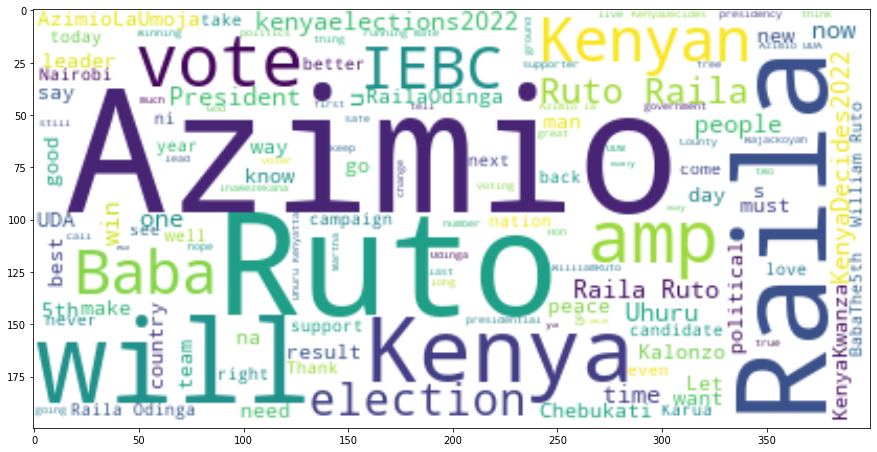

In [ ]:
# Plotting a cloud of words for Raila
from wordcloud import WordCloud, STOPWORDS


Tweet=" ".join(Tweet for Tweet in raila.Tweet)
Tweet=" ".join(filter(lambda x:x[0]!='@', Tweet.split()))
import re
text=re.sub(r"http\S+", "", Tweet)


print("there have{} words in all text".format(len(Tweet)))
WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize =(15,10))
plt.imshow(WC, interpolation='bilinear')

there have238516 words in all text


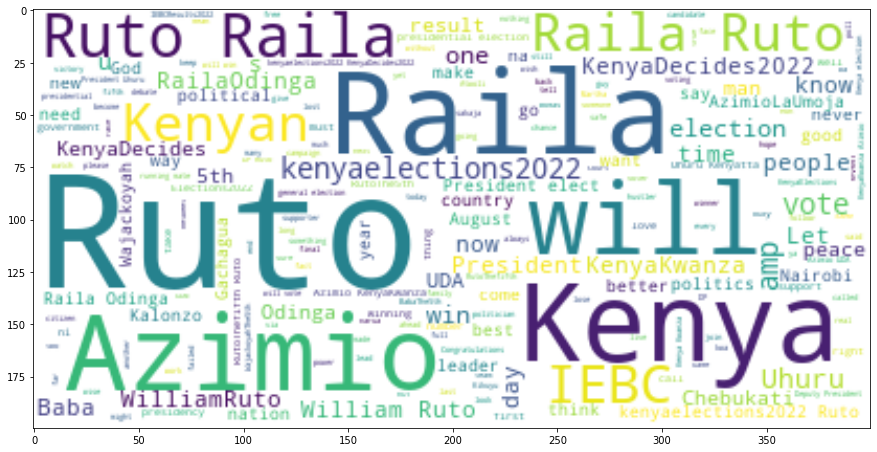

In [ ]:
# Plotting a cloud of words for Raila


Tweet=" ".join(Tweet for Tweet in ruto.Tweet)
Tweet=" ".join(filter(lambda x:x[0]!='@', Tweet.split()))
import re
text=re.sub(r"http\S+", "", Tweet)


print("there have{} words in all text".format(len(Tweet)))
WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize =(15,10))
plt.imshow(WC, interpolation='bilinear')

##Word Embedding

In [ ]:
#Merging the two datasets
data=raila.merge(ruto)
data.head()


,User,Tweet,Raila,Polarity,sentiment,Ruto
0,MosesHaabwa,"@MosesHaabwa was verified, @cisuganda was veri...",1,0.187500,Positive,1
1,ehdande,"Amidst all the post election discussions, I th...",1,-0.006250,Negative,1
2,ColourfulCool,The right to vote in our elections is bestowed...,1,0.017857,Positive,1
3,diratrends,Kalonzo Musyoka: Perhaps the constitution neve...,1,0.050000,Positive,1
4,UkraineDFS,Raila is banking on violence to intimidate hus...,1,0.187500,Positive,1


In [ ]:
# Converting sentiment labels to 0 & 1

# Define a function to convert sentiment labels to 0 and 1
def convert_sentiment_label(sentiment_label):
    if sentiment_label == 'Positive':
        return 1
    else:
        return 0

# Apply the function to the 'sentiment' column of your dataframe
data['sentiment'] = data['sentiment'].apply(convert_sentiment_label)

In [ ]:
data['sentiment'].unique()

array([1, 0])

Sentiment column has labels 0 and 1

In [ ]:
data.head()

,User,Tweet,Raila,Polarity,sentiment,Ruto
0,MosesHaabwa,"@MosesHaabwa was verified, @cisuganda was veri...",1,0.187500,1,1
1,ehdande,"Amidst all the post election discussions, I th...",1,-0.006250,0,1
2,ColourfulCool,The right to vote in our elections is bestowed...,1,0.017857,1,1
3,diratrends,Kalonzo Musyoka: Perhaps the constitution neve...,1,0.050000,1,1
4,UkraineDFS,Raila is banking on violence to intimidate hus...,1,0.187500,1,1


In [ ]:
# Separating positive and negative tweets

data_pos = data[data['sentiment'] == 1]
data_neg = data[data['sentiment'] == 0]

In [ ]:
#Balancing the positve and negative sentiments data so we can run on our machine easily

data_pos = data_pos.iloc[:int(300)]
data_neg = data_neg.iloc[:int(300)]


In [ ]:
#Combining positive and negative tweets

dataset = pd.concat([data_pos, data_neg])

In [ ]:
#Dropping some columns
dataset= dataset[['Tweet', 'sentiment']]
dataset.head()

,Tweet,sentiment
0,"@MosesHaabwa was verified, @cisuganda was veri...",1
2,The right to vote in our elections is bestowed...,1
3,Kalonzo Musyoka: Perhaps the constitution neve...,1
4,Raila is banking on violence to intimidate hus...,1
6,I said it a long time ago! #Azimio are leaderl...,1


In [ ]:
#Removing stop words
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(Tweet):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', Tweet)

In [ ]:
#Importing dependencies
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

#Defining preprocess function

def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [ ]:
# Calling preprocessing_text function 

X = []
sentences = list(dataset['Tweet'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
# Sample cleaned Tweet
X[4]



'said long time ago azimio leaderless williamsruto dissect thing skin bone long railaodinga standing alone odm never compete protege especially smart one https co mg twsg w'

Observation:

1. The punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we have also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

##Preparing embedding layer

Embedding layer converts our textual data into numeric form. It is then used as the first layer for the deep learning models in Keras.

In [ ]:
# Cleaning and removing repeating characters
dataset['Tweet']=dataset['Tweet'].apply(str)

def cleaning_repeating_char(Tweet):
    return re.sub(r'(.)1+', r'1', Tweet)
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['Tweet'].tail()

627    @alphayokym @RailaOdinga Don't use the name of...
634    @RailaOdinga hit hard!\n\nBabu Owino\nJacarand...
643    2022!! As a Ugandan domicile in Kenya, i will ...
648    Poverty is evident yet we have vast fertile la...
652    We have no shortage of dunderheads who are lea...
Name: Tweet, dtype: object

In [ ]:
#Applyin stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(dataset):
    Tweet = [st.stem(word) for word in dataset]
    return dataset
dataset['Tweet']= dataset['Tweet'].apply(lambda x: stemming_on_text(x))
dataset['Tweet'].head()

0    @MosesHaabwa was verified, @cisuganda was veri...
2    The right to vote in our elections is bestowed...
3    Kalonzo Musyoka: Perhaps the constitution neve...
4    Raila is banking on violence to intimidate hus...
6    I said it a long time ago! #Azimio are leaderl...
Name: Tweet, dtype: object

In [ ]:

# Separating input feature and label

X=dataset.Tweet
y=dataset.sentiment

In [ ]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train for modelling 
# while test set will be used to evaluate how well our model performs 

In [ ]:
# Transforming Dataset using TF-IDF Vectorizer
# Fit the TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer


vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))


No. of feature_words:  10000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
# Transform the data using TF-IDF Vectorizer

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report



In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear')
 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6122448979591837
              precision    recall  f1-score   support

           0       0.67      0.10      0.17        40
           1       0.61      0.97      0.75        58

    accuracy                           0.61        98
   macro avg       0.64      0.53      0.46        98
weighted avg       0.63      0.61      0.51        98



Text(0.5, 1.0, 'Confusion Matrix')

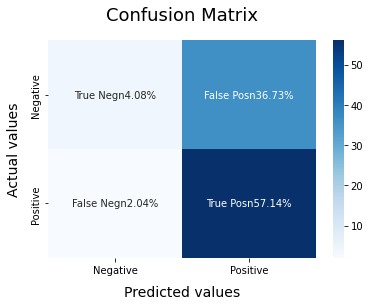

In [ ]:
#Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

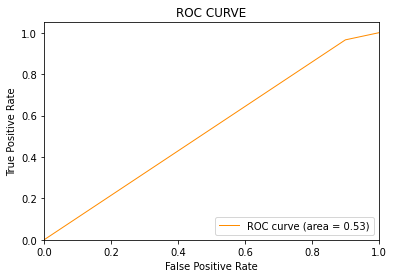

In [ ]:
#Plotting ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##Challenging the soulution

In [ ]:
#usin
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

NameError: ignored

##Deployment

We will deploy using pickle

In [ ]:
# saving model
with open('churn-model.bin', 'wb') as f_out:
  pickle.dump(model, f_out)

In [ ]:
# closing the with construction code used to save the model
f_out = open('churn-model.bin', 'wb')
pickle.dump(model, f_out)
f_out.close()

In [ ]:
# pickling using both model and DictVectorizer used to run the model
with open('churn-model.bin', 'wb') as f_out:
  pickle.dump(dv, model, f_out)

In [ ]:
# loading the model

with open('churn-model.bin', 'rb') as f_in:
  model = pickle.load(f_in)

In [ ]:
def predict_single(dv, tweet, model):
  X = dv.transform([tweet])
  y_pred = model.predict_proba(X)[:, 1]
  return y_pred[0]

In [ ]:
with open('churn-model.bin', 'rb') as f_in:
  dv, model = pickle.load(f_in)

TypeError: ignored

In [ ]:
prediction = predict_single(tweet, dv, model)